                                               Stock Market Prediction
                                             
                                             Ghoudan Youssef & Lamti Badr
                                             
                                                   January 30, 2017

# The dataset

In this report, we'll use datasets from the Numerai tournament "__a hedge fund crowd-sourcing stock market predictions__". Numerai is a global artificial intelligence tournament to predict the stock market.

__Numerai__ manages an institutional grade _long/short_ global equity strategy for the investors in their hedge fund.They transform, regularize and encrypt financial data into machine learning problems and give it away for free.
For this tournament, we have one datasets which is our training data. 

__Training data__ : The task is binary classification (target = 0 means short, target = 1 means Long). The dataset is low dimensional, it has 22 columns. 21 columns consists of our features ranging from feature 1 to feature 21 the last column is the target value; a 1 or 0 value which is going to be used to train our classifier. The dataset has a lot of examples, but not too many - We have about 57 000 rows.

#The hypothesis

Using this data, the objective is to predict whether a stock is trending upward or downward so __Numerai__ could take _long_ positions in stocks that are expected to increase in value and _short_ positions in stocks that are expected to decrease in value.

__Long position :__ A long is the buying of a stock, with the expectation the asset will rise in value.


__Short position :__  A short means borrowing a stock you don’t own, selling it, then hoping it declines in value, at which time you can buy it back at a lower price than you paid for it and return the borrowed shares.

If someone want to short some given stock, be careful, going short is more risky than going long !

![Shorting is dangerous](http://www.guerillastocktrading.com/wp-content/uploads/2014/09/stock-trading-meme1.jpg)


#The metric

Metrics are used to estimate the performance of our models. The metric for the competition is __Logarithmic Loss__ :


$$logloss= -\frac{1}{N}\sum_{i=1}^N[y_i\log(\widehat{y_i}) + (1-y_i)\log(1-\widehat{y_i})]$$
where :
- $n$ is the number of examples in the training set.
- $\widehat{y_i}$ is the predicted probability of the stock rising in value.
- $y_i$ is 1 if the position taken is long, 0 otherwise.

Smaller the __Logarithmic Loss__, better is the model.

__Intuition behind the Logarithmic Loss :__

_Log loss_ is used when we have {0,1} response. This is usually because when we have {0,1} response, the best models give us values in terms of probabilities.

In simple words, log loss measures the __UNCERTAINTY__ of the probabilities of your model by comparing them to the true labels.


Before we get into our evaluation, we first will analyze the training dataset.

#Descriptives

We used the __pandas__ library method “read_csv” to parse the data into a DataFrame object.
Here is a sample from the dataset : 

In [5]:
import pandas as pd

training_data=pd.read_csv(r'numerai_training_data.csv')
training_data.head(n=5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,0.263669,0.711012,0.730641,0.259069,0.331150,0.300947,0.468118,0.426362,0.545662,0.472496,...,0.869772,0.219606,0.690553,0.697929,0.332535,0.500681,0.418926,0.272475,0.822392,1
1,0.828056,0.433518,0.435617,0.209394,0.508133,0.296114,0.082211,0.876144,0.201528,0.630515,...,0.570470,0.235018,0.588986,0.767599,0.585097,0.458801,0.960031,0.732236,0.543159,0
2,0.089681,0.590072,0.715500,0.921637,0.542368,0.729199,0.979151,0.009172,0.929291,0.854326,...,0.847301,0.894065,0.791371,0.721615,0.202686,0.845608,0.046535,0.200791,0.654688,0
3,0.796596,0.276844,0.234234,0.798410,0.129723,0.794306,0.174816,0.823313,0.209920,0.008414,...,0.094406,0.817543,0.342794,0.215916,0.015114,0.207310,0.845106,0.017104,0.016130,0
4,0.040664,0.036370,0.438090,0.219633,0.100569,0.097791,0.089305,0.337548,0.382942,0.160545,...,0.074038,0.044325,0.844283,0.792098,0.842606,0.133044,0.002375,0.795792,0.128112,1


General analysis for all the variables :

In [37]:
training_data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
count,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,...,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000,57771.000000
mean,0.495515,0.504806,0.501291,0.525232,0.490325,0.501399,0.492902,0.500034,0.496661,0.491700,...,0.508338,0.492883,0.516477,0.534609,0.487273,0.513251,0.496786,0.496528,0.506407,0.507313
std,0.286843,0.289952,0.293140,0.289845,0.292437,0.286529,0.284225,0.285824,0.292720,0.281561,...,0.291265,0.290822,0.283163,0.292226,0.288464,0.289846,0.292101,0.286538,0.292980,0.499951
min,0.000000,0.000000,0.000000,0.000000,0.000810,0.000000,0.000000,0.000000,0.000000,0.000034,...,0.000000,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255061,0.263065,0.247832,0.276403,0.226864,0.250692,0.252745,0.261614,0.240044,0.254334,...,0.264428,0.243085,0.278300,0.289773,0.242321,0.263774,0.242654,0.249704,0.235558,0.000000
50%,0.479254,0.496178,0.510131,0.539201,0.493210,0.505608,0.487354,0.490177,0.497191,0.476783,...,0.504100,0.494066,0.524214,0.560189,0.489725,0.512149,0.495928,0.505668,0.512987,1.000000
75%,0.747885,0.768643,0.758342,0.777407,0.743655,0.742080,0.739014,0.748659,0.751543,0.730126,...,0.777105,0.753093,0.759584,0.793325,0.741703,0.755116,0.744884,0.747680,0.762487,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Visualization

It's interesting to explore the correlation between variables.Below we ploted the __Correlation matrix heatmap__ to know which variables are strongly correlated.

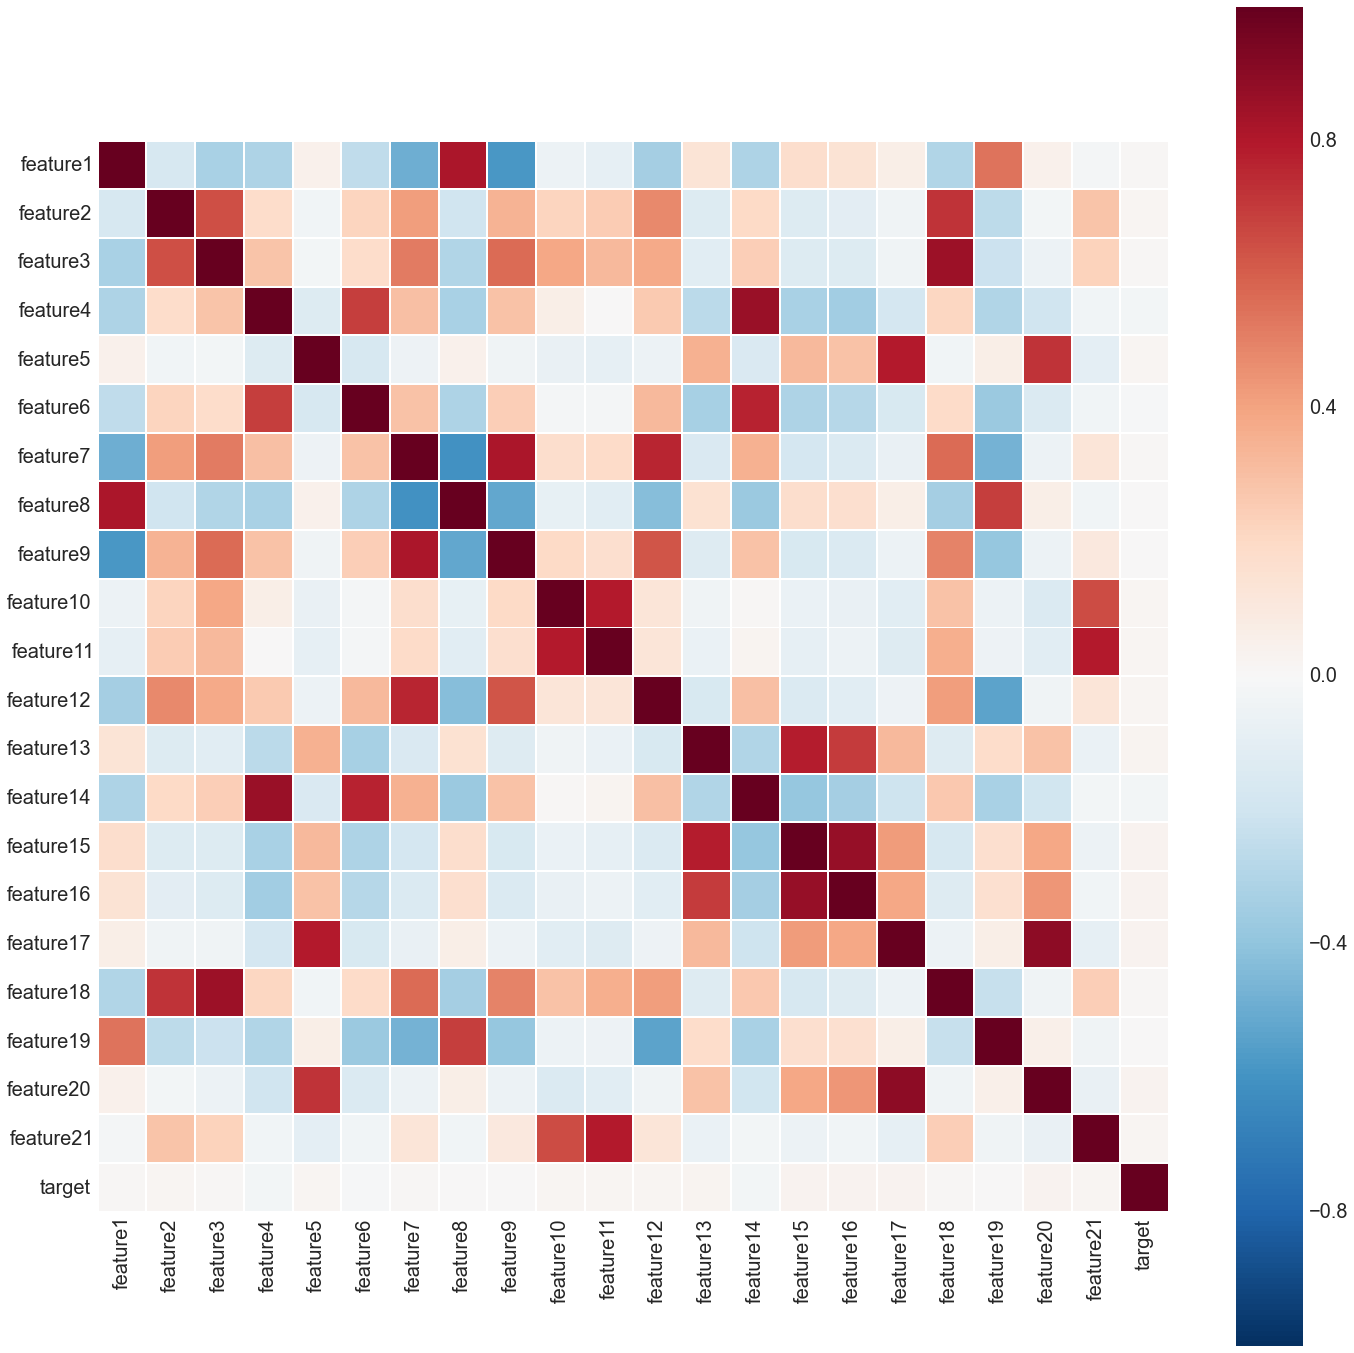

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')
sns.set_context('notebook', font_scale=2)
df_plot = pd.melt(training_data, 'target', var_name='feature')

fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(training_data.corr(), square=True)

Some variables are highly correlated with each other. We call this __multicollinearity__.

__Multicollinearity :__ means that some variables are storngly correlated with each other, It will make the estimate highly in-stable. This instability will increase the variance of estimates. It means that if there is a small change in X, produces large changes in estimate.

__Effects of Multicollinearity__ :

It will be difficult to find out precise effect of each variable.
If the estimates are not reliable, then it will perform poorly on test data because the estimated function mightn’t have generalised it properly for the data. Then, the prediction accuracy for test data will be bad.

![multicollinearity](https://cdn.meme.am/cache/instances/folder904/500x/19312904.jpg)

We'll remove some highly correlated variables ( > 0.85) :

In [15]:
import numpy as np
# calculate the correlation matrix (ignore target field)
df_corr = training_data.drop(['target'],axis=1).corr(method='spearman')
 
# create a mask to ignore self-
mask = np.ones(df_corr.columns.size) - np.eye(df_corr.columns.size)
df_corr = mask * df_corr
 
drops = []
# loop through each variable
for col in df_corr.columns.values:
    # if we've already determined to drop the current variable, continue
    if np.in1d([col],drops):
        continue
    
    # find all the variables that are highly correlated with the current variable 
    # and add them to the drop list 
    corr = df_corr[abs(df_corr[col]) > 0.85].index
    drops = np.union1d(drops, corr)
 
print "\nDropping", drops.shape[0], "highly correlated features...\n", drops
training_data.drop(drops, axis=1, inplace=True)


Dropping 4 highly correlated features...
['feature14' 'feature16' 'feature18' 'feature20']


#Evaluation

Evaluating the performance of a model is one of the core stages in the data science process. It indicates how successful the predictions of a dataset has been by a trained model (the smallest log loss in our case).

There are standard ways to measure the performance of your model, we'll use __Cross-validation__.

![Cross validation](https://cdn.meme.am/cache/instances/folder510/500x/60810510.jpg)

__Cross-validation :__ is primarily a way of measuring the predictive performance of a statistical model to an independent data set (Retrieved from http://robjhyndman.com). One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are averaged over the rounds.



![Cross validation](https://s3.amazonaws.com/media-p.slid.es/uploads/270942/images/2835858/07_cross_validation_diagram.png)

The image above show the _5-Fold Cross Validation_.

The major purpose of cross-validation is to avoid overfitting. 

Overfitting ?! what does it mean bro' ?

__Overfitting :__ Overfitting occurs when a machine learning algorithm, such as a classifier, identifies not only the signal in a dataset, but the noise as well. _Noise_ here means the model is too sensitive to features of the dataset that don’t really mean anything. The practical outcome of overfitting is that a classifier which appears to perform well on its training data may perform poorly, possibly very badly, on new data from the same problem.

![overfitting](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png)

We are going to evaluate three models : __Logistic Regression__, __Random Forest__ and __Gradient Boosting Machine__ and see how they perform using 5-Fold Cross-validatrion. 

In [19]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

train = pd.read_csv(r'numerai_training_data.csv')
labels = train.target

features = train.columns.drop('target')
drops=['feature14' 'feature16' 'feature18' 'feature20']
training_data.drop(drops, axis=1, inplace=True)
train = train[features]
train = np.array(train)

skf=StratifiedKFold(labels, n_folds=5,shuffle=True, random_state=5545)

submissions = []
scores = []
print 'Logistic Regression :'
for i,(tr,tst) in enumerate(skf):
    lr= LogisticRegression()
    _ = lr.fit(train[tr],labels[tr])
    preds = lr.predict_proba(train[tst])[:,1]
    score = log_loss(labels[tst],preds)
    scores.append(score)
    print 'score cv :',i,score
    print '----------------'

print '-'*10
print 'std',np.std(scores)
print 'mean on 5 Folds :',np.mean(scores)
print '-'*10

print 'Random Forest :'
for i,(tr,tst) in enumerate(skf):
    rf= RandomForestClassifier()
    _ = rf.fit(train[tr],labels[tr])
    preds = rf.predict_proba(train[tst])[:,1]
    score = log_loss(labels[tst],preds)
    scores.append(score)
    print 'score cv :',i,score
    print '----------------'

print '-'*10
print 'std',np.std(scores)
print 'mean on 5 Folds :',np.mean(scores)
print '-'*10

print 'Gradient Boosting Machine :'
for i,(tr,tst) in enumerate(skf):
    gbm= GradientBoostingClassifier()
    _ = gbm.fit(train[tr],labels[tr])
    preds = gbm.predict_proba(train[tst])[:,1]
    score = log_loss(labels[tst],preds)
    scores.append(score)
    print 'score cv :',i,score
    print '----------------'

print '-'*10
print 'std',np.std(scores)
print 'mean on 5 Folds :',np.mean(scores)
print '-'*10

Logistic Regression :
score cv : 0 0.691629160437
----------------
score cv : 1 0.690722606587
----------------
score cv : 2 0.691937066798
----------------
score cv : 3 0.691033087824
----------------
score cv : 4 0.691900001517
----------------
----------
std 0.000484684056424
mean on 5 Folds : 0.691444384633
----------
Random Forest :
score cv : 0 0.800238447636
----------------
score cv : 1 0.793679822913
----------------
score cv : 2 0.792898459159
----------------
score cv : 3 0.804449808122
----------------
score cv : 4 0.788310623428
----------------
----------
std 0.0523928728894
mean on 5 Folds : 0.743679908442
----------
Gradient Boosting Machine :
score cv : 0 0.692668450712
----------------
score cv : 1 0.691298286659
----------------
score cv : 2 0.692565388907
----------------
score cv : 3 0.692042895534
----------------
score cv : 4 0.69175963022
----------------
----------
std 0.0492145591017
mean on 5 Folds : 0.72647558243
----------


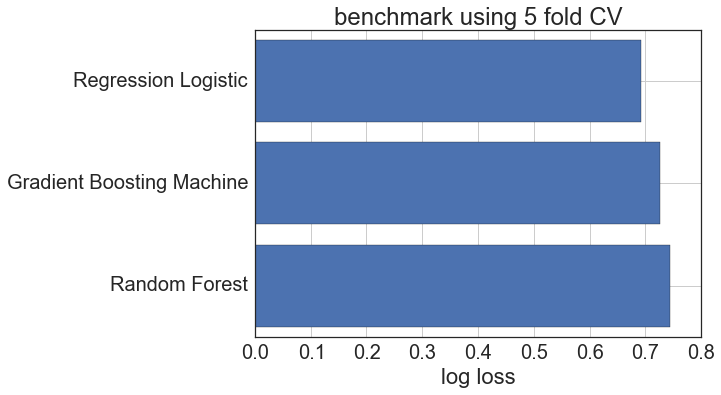

In [58]:
from pylab import *
val = [0.7436,0.7264,0.6914]    # the bar lengths
pos = [0.5,1.5,2.5]    # the bar centers on the y axis

figure(1)
barh(pos,val, align='center')
yticks(pos, ('Random Forest', 'Gradient Boosting Machine ', 'Regression Logistic'))
xlabel('log loss')
title('benchmark using 5 fold CV')
grid(True)

- Logistic Regression performed the best with __log loss__ = 0.6914
- Random Forest and Gradient Boosting machine (based tree approach) performed poorly. 

The question is __can we do better ?__

Of course we can! We can tune our _hyperparameters_ and improve significantly the model's performance.
Because of this, it’s important to understand the concept of _hyperparameter tuning_ and how your choice in hyperparameters can dramatically impact the overall model's performance.

#Tuning Hyperparameters

__Hyperparameters__ are simply the knobs and levels you pull and turn when building a machine learning classifier. The process of tuning hyperparameters is more formally called _hyperparameter optimization_.

As a concrete example of tuning hyperparameters, let’s consider the __Random Forest Classifier__. 

For the standard Random Forest implementation, there are three primary hyperparameters that we’ll want to tune:

- _n_estimators_ The more estimators you give it, the better it will do. 500 or 1000 is usually sufficient.
- _max_features_  is worth exploring for many different values. It may have a large impact on the behavior of the Random Forest because it decides how many features each tree in the Random Forest considers at each split.
- _max depth_ max depth of each tree (default none, leading to full tree) - reduction of the maximum depth helps fighting with overfitting.

Both of these values can dramatically affect the accuracy of our Random Forest Classifier. To demonstrate this in the context of stock market prediction, let’s apply hyperparameter tuning to our training set.

__Grid Search Method :__


The __Grid Search__ tuning algorithm will methodically (and exhaustively) train and evaluate a machine learning classifier for each and every combination of hyperparameter values.

In this case, given 10 unique values of _n_estimators_ and 2 unique values for our _max_features_  parameter, a Grid Search will apply 20 different experiments to determine the optimal value.

You can see how a Grid Search is performed in the following code segment :

In [49]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

train = pd.read_csv(r'numerai_training_data.csv')
labels = train.target

features = train.columns.drop('target')

train = train[features]
train = np.array(train)

skf=StratifiedKFold(labels, n_folds=5,shuffle=True, random_state=5545)
param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt']
}
rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= skf, scoring='log_loss')
CV_rfc.fit(train, labels)

GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[1 0 ..., 1 1], n_folds=5, shuffle=True, random_state=5545),
       estimator=RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='log_loss', verbose=0)

With parameter tuning we improved our Random Forest Classifier, Kudos ! 

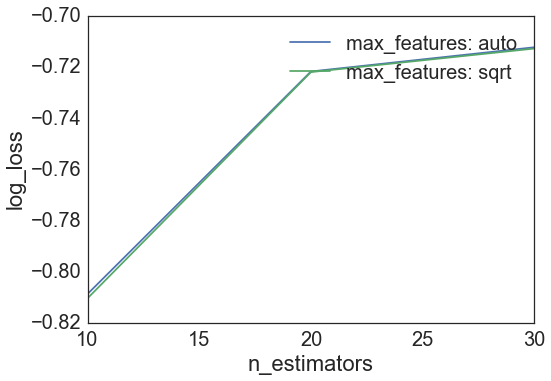

In [54]:
scores = [x[1] for x in CV_rfc.grid_scores_]
scores = np.array(scores).reshape(len(param_grid['max_features']), len(param_grid['n_estimators']))

for ind, i in enumerate(param_grid['max_features']):
    plt.plot(param_grid['n_estimators'], scores[ind], label='max_features: ' + str(i))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('log_loss')
plt.show()

The more _n_estimators_ we have the more our model perform good !

__Improvement and Conclusion :__

Next step is to aggregate all the models above to have a stronger classifier using ensembling methods.
I hope you enjoyed this tutorial so far. Feel free to drop comments, questions on the github repository.